In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline


In [2]:
def read_data_from_txt(file_name):
    to_read_file = open(file_name, "r")
    paths = to_read_file.read().split('\n')
    path_time = []
    path_x = []
    path_y = []
    for path_data in paths:
        path_data_detail = path_data.split(',')
        if path_data_detail == ['']:
            continue
        t_sec = path_data_detail[0].split(' ')[1].split(':')
        t_sec = float(t_sec[0]) * 60 * 60 +  float(t_sec[1]) * 60 + float(t_sec[2])
        path_time.append(t_sec)
        path_x.append(float(path_data_detail[1]))
        path_y.append(float(path_data_detail[2]))
    print file_name, 'length: ', len(path_time)
    return path_time, path_x, path_y

In [3]:
class Path:
    def __init__(self):
        self.t = [] # time
        self.x = [] # position x
        self.y = [] # position y
        self.v = [] # velocity
        self.a = [] # acceleration
        self.dt = []
        self.d = [] # distance

In [4]:
def calculate_velocity(path):
    v = []
    d = []
    dtt = [] 
    for i in range(len(path.t)-1):
        dt = path.t[i+1] - path.t[i]
        dx = path.x[i+1] - path.x[i]
        dy = path.y[i+1] - path.y[i]
        d_cal = math.sqrt(dx * dx + dy * dy) 
        v_cal = d_cal / dt
        #print dx, dy, v_cal * dt, v_cal, dt
        d.append(d_cal)
        v.append(v_cal)
        dtt.append(path.t[i+1] - path.t[0])
    return d, v, dtt

def calculate_a(path):
    a = []
    a.append(path.v[0]/(path.t[1]-path.t[0]))
    for i in range(len(path.t)-2):
        dv = path.v[i+1] - path.v[i]
        dt = path.t[i+2] - path.t[i+1]
        a_cal = dv / dt
        #print dv, dt, a_cal
        a.append(a_cal)
    return a

In [5]:
def cal_ape(base_path, target_path):
    error = []
    tp_number = 0
    count = 0
    i = 0
    get_taget_last = False
    while(count < len(base_path.t)):
        bp_dt = base_path.t[i] - base_path.t[0]
        tp_dt = target_path.t[tp_number] - target_path.t[0]
        if bp_dt > tp_dt and (tp_number + 1) < len(target_path.t):
            tp_number += 1
            continue
        if bp_dt <= tp_dt or (tp_number + 1) == len(target_path.t):
            dx = base_path.x[i] - target_path.x[tp_number]
            dy = base_path.y[i] - target_path.y[tp_number]
            e = math.sqrt(dx * dx + dy * dy)
            error.append(e)
            #print i+1, tp_number+1, e
        i += 1
        count += 1
    return error

In [6]:
def cal_ape2(base_path, target_path):
    error = 0
    for i in range(len(target_path.t)):
        e_final = 1000
        for j in range(len(base_path.t)):
            dx = base_path.x[j] - target_path.x[i]
            dy = base_path.y[j] - target_path.y[i]
            e_r = math.sqrt(dx * dx + dy * dy)
            if e_r < e_final:
                e_final = e_r
        error += e_final
        #print e_final
    return error

In [40]:
#folder_name = "thesis/3_2/speed1"
folder_name = "thesis/3_3/obsamoos3_3"

In [41]:
for i in range(1):
    als_path = Path()
    als_path.t, als_path.x, als_path.y = read_data_from_txt("/home/arg/" + folder_name + "/als_path" + str(i+1) + ".txt")
    if len(als_path.t) != 0:
        als_path.d, als_path.v, als_path.dt = calculate_velocity(als_path)
        als_path.a = calculate_a(als_path)

    if(False):
        gt_path = Path()
        gt_path.t, gt_path.x, gt_path.y = read_data_from_txt("/home/arg/" + folder_name + "/gt_path" + str(i+1) + ".txt")
        gt_path.d, gt_path.v, gt_path.dt = calculate_velocity(gt_path)
        gt_path.a = calculate_a(gt_path)

    gps_path = Path()
    gps_path.t, gps_path.x, gps_path.y = read_data_from_txt("/home/arg/" + folder_name + "/gps_path" + str(i+1) + ".txt")
    if len(gps_path.t) != 0:
        gps_path.d, gps_path.v, gps_path.dt = calculate_velocity(gps_path)
        gps_path.a = calculate_a(gps_path)

    #print str(i+1)
    #als_e = cal_ape(gt_path, als_path)
    #print 'als total: ', sum(als_e) / len(als_path.t)
    #gps_e = cal_ape(gt_path, gps_path)
    #print 'gps total: ', sum(gps_e) / len(gps_path.t)
    #als_e = cal_ape2(gt_path, als_path)
    #print 'als closest point: ', als_e / len(als_path.t)
    #gps_e = cal_ape2(gt_path, gps_path)
    #print 'gps closest point: ', gps_e / len(gps_path.t)


/home/arg/thesis/3_3/obsamoos3_3/als_path1.txt length:  0
/home/arg/thesis/3_3/obsamoos3_3/gps_path1.txt length:  340


In [42]:
print folder_name
if len(als_path.t) != 0:
    print "als"
    print "sum time: ", als_path.dt[len(als_path.t)-2]
    print "sum distance", sum(als_path.d)
if len(gps_path.t) != 0:
    print "gps"
    print "sum time: ", gps_path.dt[len(gps_path.t)-2]
    print "sum distance", sum(gps_path.d)

thesis/3_3/obsamoos3_3
gps
sum time:  33.891273
sum distance 15.1179637933


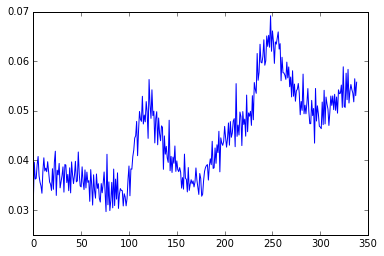

In [43]:
if(False):
    als_e = cal_ape(gt_path, als_path)
    print 'als ape1: ', sum(als_e) / len(als_path.t)
    gps_e = cal_ape(gt_path, gps_path)
    print 'gps ape1: ', sum(gps_e) / len(gps_path.t)
    als_e = cal_ape2(gt_path, als_path)
    print 'als ape2: ', als_e / len(als_path.t)
    gps_e = cal_ape2(gt_path, gps_path)
    print 'gps ape2: ', gps_e / len(gps_path.t)
plt.plot(gps_path.d)

45 45


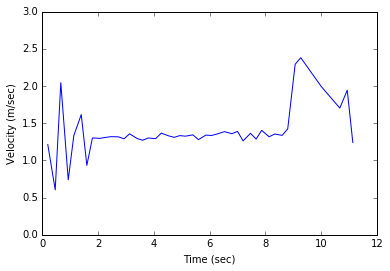

In [19]:
print len(als_path.dt), len(als_path.v)
plt.plot(als_path.dt, als_path.v)
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (m/sec)')
plt.ylim(0, 3)
plt.savefig('/home/arg/'+ folder_name + '/als_v.png')


45 45


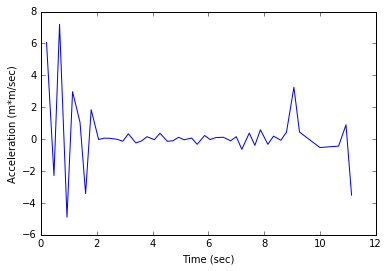

In [14]:
print len(als_path.dt), len(als_path.a)
plt.plot(als_path.dt, als_path.a)
plt.xlabel('Time (sec)')
plt.ylabel('Acceleration (m*m/sec)')
plt.savefig('/home/arg/'+ folder_name + '/als_a.png')

11 11


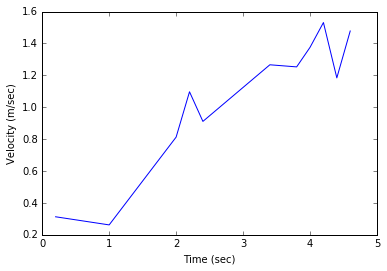

In [23]:
print len(gps_path.dt), len(gps_path.v)
plt.plot(gps_path.dt, gps_path.v)
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (m/sec)')
plt.savefig('/home/arg/'+ folder_name + '/gps_v.png')

338 338


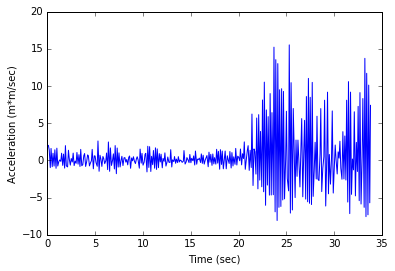

In [41]:
print len(gps_path.dt), len(gps_path.a)
plt.plot(gps_path.dt, gps_path.a)
plt.xlabel('Time (sec)')
plt.ylabel('Acceleration (m*m/sec)')
plt.savefig('/home/arg/'+ folder_name + '/gps_a.png')

In [42]:
print 'max v als: ', max(als_path.v)
print 'max a als: ', max(als_path.a)
print 'max v gps: ', max(gps_path.v)
print 'max a gps: ', max(gps_path.a)

max v als:  2.720196352
max a als:  6.81932841963
max v gps:  2.12728956217
max a gps:  15.5248256851
